**Single Shot MultiBox Detector model for object detection**


In [ ]:
%%bash
pip install numpy scipy scikit-image matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Load SSD model pretrained on COCO dataset

In [ ]:
import torch
ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

Downloading: "https://github.com/NVIDIA/DeepLearningExamples/archive/torchhub.zip" to /root/.cache/torch/hub/torchhub.zip
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/common.py:14: UserWarning: pytorch_quantization module not found, quantization will not be available
  "pytorch_quantization module not found, quantization will not be available"
/root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub/PyTorch/Classification/ConvNets/image_classification/models/efficientnet.py:18: UserWarning: pytorch_quantization module not found, quantization will not be available
  "pytorch_quantization module not found, quantization will not be available"
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

Using cache found in /root/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


Prepare the loaded model for inference

In [ ]:
ssd_model.to('cuda')
ssd_model.eval()

SSD300(
  (feature_extractor): ResNet(
    (feature_extractor): Sequential(
      (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (4): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (relu): ReLU(inplac

Prepare input images for object detection.

In [ ]:
uris= ["https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS1w-Bry-PX42X8tFiwIW9GER0t5kV8WDpGxA&usqp=CAU",
              "https://media.istockphoto.com/photos/group-of-pets-posing-around-a-border-collie-dog-cat-ferret-rabbit-picture-id1296353202?k=20&m=1296353202&s=612x612&w=0&h=-J5RllK3gwzLCkYbLUUPHmGuMxpneC7cfkAKFpfNfuk=",
              "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTMwMb0vT4Tr6QoOmdrAmfEVEMw6zivkZuYWg&usqp=CAU",
              "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5MCFoJbAuFjaf9AvarYyupDqUySsTFk3AIA&usqp=CAU",
              "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRfujSuDb4x5Bt3fgt1CfN47SsGs0DwfclP6w&usqp=CAU",
              "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQWfAP_Qnnmqzx3HV_0Qf6w8e1z_3TPeQ1_IA&usqp=CAU",
              "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSZh_hftblb3ljbg9PExv_SXsTJdVPBN97EKQ&usqp=CAU",
              "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTk1d0gvzG9iTegWSFlrWMN2EM96Dk0p4d1Ww&usqp=CAU",
              "https://tse3.mm.bing.net/th?id=OIP.MPL8zIhA6zudsD0_qzCK4gHaE8&pid=Api&P=0&w=264&h=176",
              "https://tse2.mm.bing.net/th?id=OIP.XmeT2ifY9Exutk60RNXpogHaD4&pid=Api&P=0&w=330&h=172"]

Format the images to comply with the network input and convert them to tensor.

In [ ]:
inputs = [utils.prepare_input(uri) for uri in uris]
tensor = utils.prepare_tensor(inputs)

Run the SSD network to perform object detection.

In [ ]:
with torch.no_grad():
    detections_batch = ssd_model(tensor)

Filtering the boxes to only get reasonable (confidence>40% boxes)

In [ ]:
results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.40) for results in results_per_input]

Downloading annotationsfor coco dataset

In [ ]:
classes_to_labels = utils.get_coco_object_dictionary()

Visualization

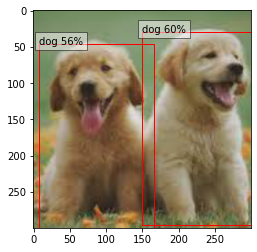

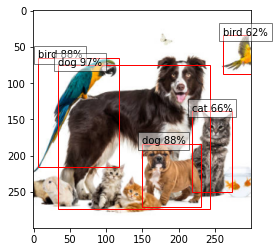

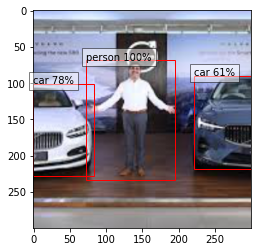

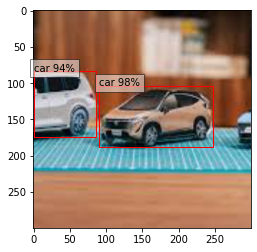

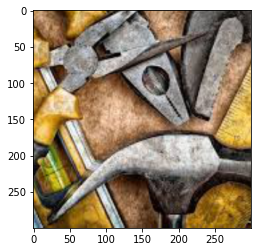

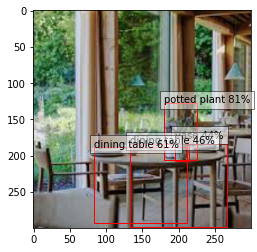

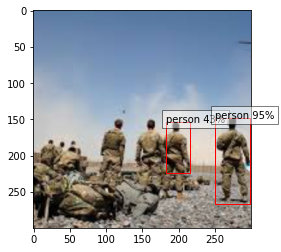

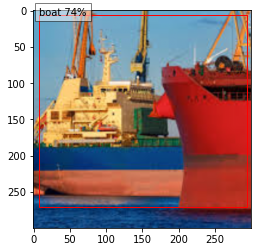

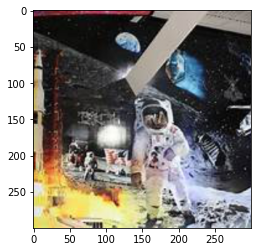

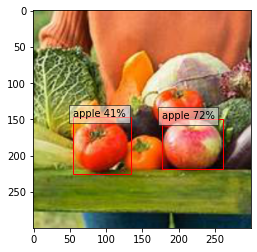

In [ ]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()